In [154]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [135]:
# display Dataset as a Pandas DataFrame

data = pd.read_csv('Resources/COVID_staff_shortages.csv')
data

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,ME,2021/01/23,1,30,8,2,29,8,3.0,38,...,NaN,0,NaN,0,NaN,0,47.0,38,60.0,38
1,SD,2021/01/23,2,60,3,2,60,3,27.0,62,...,NaN,0,NaN,0,NaN,0,36.0,62,83.0,62
2,MD,2021/01/22,2,57,1,2,57,1,31.0,59,...,NaN,0,NaN,0,NaN,0,172.0,59,240.0,59
3,RI,2021/01/22,6,8,1,6,8,1,6.0,14,...,NaN,0,NaN,0,NaN,0,62.0,14,93.0,14
4,ID,2021/01/21,4,40,8,5,39,8,0.0,51,...,NaN,0,NaN,0,NaN,0,82.0,30,230.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,6,58,1,7,57,1,3.0,64,...,NaN,0,NaN,0,NaN,0,8.0,9,18.0,9
54007,NJ,2021/03/09,9,61,8,10,60,8,76.0,77,...,NaN,0,NaN,0,NaN,0,49.0,24,107.0,24
54008,NM,2021/05/19,12,43,1,16,39,1,2.0,55,...,NaN,0,NaN,0,NaN,0,0.0,19,0.0,19
54009,NE,2021/04/15,9,91,1,16,84,1,1.0,100,...,NaN,0,NaN,0,NaN,0,0.0,12,0.0,12


In [ ]:
#Hypothesis 4
## Null Hypothesis: There is no correlation seen between the number of hospitals in an state, and the how the hospital is filled and dealing with shortages.

## Alernative Hypothesis: There is a relationship between the number of hospitals, and the shortages and beds available in a hl

In [136]:
# Explore the Data and include critical staffing shortage, number of inpatient beds, and number of inpatient beds used for the new data frame
states_data = data[["state", "critical_staffing_shortage_today_yes", "inpatient_beds", "inpatient_beds_used"]]
states_data

,state,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
0,ME,1,3229.0,2231.0
1,SD,2,2868.0,1641.0
2,MD,2,11827.0,9635.0
3,RI,6,2402.0,2445.0
4,ID,4,3694.0,2268.0
...,...,...,...,...
54006,MT,6,2938.0,1762.0
54007,NJ,9,21569.0,15395.0
54008,NM,12,4446.0,3181.0
54009,NE,9,4368.0,2958.0


In [137]:
# Average the data by state
avg_states_data = states_data.groupby(["state"]).mean().head(100)
avg_states_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
state,,,
AK,1.632114,1600.081301,1084.013211
AL,15.566604,13320.209193,10315.438806
AR,12.816184,8358.250749,5763.789211
AS,0.006452,150.000000,67.913978
AZ,16.815920,14717.461692,10900.769154


In [138]:
# Find number of states included in the table
len(avg_states_data.index)

54

In [139]:
# Import new table with the number of states
number = pd.read_csv("/Users/iqraimam/Desktop/healthcare_module7/state_hospital.csv")
number

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [140]:
## Get rid of the states that are not included in the other table
nn = number.drop([12,27], axis = 0)
nn

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [141]:
# Strip the extra blanks within the graphs so it can work when merging
nn['state'] = nn['state'].str.strip()
nn

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [142]:
# Move state to index for the data frame
state_hospitals = nn.set_index("state")
state_hospitals

,number of hospitals
state,
AK,11
AL,90
AR,52
AS,1
AZ,76
CA,339
CO,59
CT,35
DC,7


In [143]:
# Find the length of all the the new data frame
len(state_hospitals.index)

54

In [144]:
# Merge the data using pd.merge
combined_data = pd.merge(avg_states_data, state_hospitals, on = 'state', how = 'inner', indicator = False)
combined_data.head()


,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11
AL,15.566604,13320.209193,10315.438806,90
AR,12.816184,8358.250749,5763.789211,52
AS,0.006452,150.000000,67.913978,1
AZ,16.815920,14717.461692,10900.769154,76


In [145]:
# Find the length of rows for the combined data rows
len(combined_data.index)

54

In [146]:
# Convert the the type of data to float for number of hospitals
state_hospitals_df = state_hospitals.astype({'number of hospitals':'float'})
state_hospitals_df.head()

,number of hospitals
state,
AK,11.0
AL,90.0
AR,52.0
AS,1.0
AZ,76.0


In [147]:
# View the data frame for average states data
avg_states_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
state,,,
AK,1.632114,1600.081301,1084.013211
AL,15.566604,13320.209193,10315.438806
AR,12.816184,8358.250749,5763.789211
AS,0.006452,150.000000,67.913978
AZ,16.815920,14717.461692,10900.769154


In [149]:
# Use the join function to merge the two tables together
st_hosp_data = avg_states_data.join(state_hospitals_df)
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


In [127]:
set(state_hospitals_df.index)

{'AK ',
 'AL ',
 'AR',
 'AS ',
 'AZ',
 'CA ',
 'CO',
 'CT ',
 'DC ',
 'DE ',
 'FL',
 'GA',
 'HI ',
 'IA ',
 'ID',
 'IL ',
 'IN',
 'KS ',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC ',
 'ND',
 'NE',
 'NH',
 'NJ ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA ',
 'PR',
 'RI',
 'SC ',
 'SD ',
 'TN ',
 'TX',
 'UT',
 'VA ',
 'VI ',
 'VT',
 'WA ',
 'WI',
 'WV',
 'WY '}

In [151]:
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


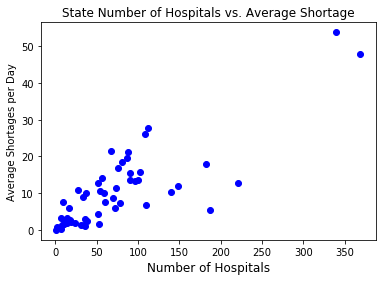

In [231]:
# Scatter plot of number of hospitals vs. avg shortage

marker_size=10
plt.scatter(st_hosp_data['number of hospitals'],st_hosp_data['critical_staffing_shortage_today_yes'], color="blue")
plt.title('State Number of Hospitals vs. Average Shortage')
plt.xlabel('Number of Hospitals',fontsize =12)
plt.ylabel('Average Shortages per Day')

plt.savefig("/Users/iqraimam/Desktop/healthcare_module7/Figure4.1.png")


In [238]:
# Find the correlation between the number of hospitals and critical staffing shortage
correlation = st.pearsonr(st_hosp_data['number of hospitals'],st_hosp_data['critical_staffing_shortage_today_yes'])
print(f"The correlation between the number of hospitals in a state and the average average staffing shortages in a day is {round(correlation[0],2)}")

The correlation between the number of hospitals in a state and the average average staffing shortages in a day is 0.82


The r-squared is: 0.673


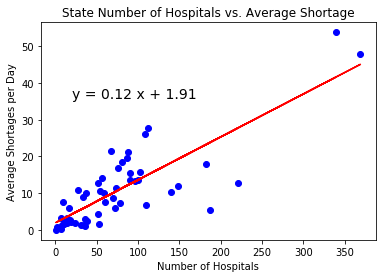

In [232]:
# Create regression line between state number of hospitals and the average shortages in a day for a state
(slope, intercept,rvalue, pvalue, stderr)= linregress(st_hosp_data["number of hospitals"],st_hosp_data["critical_staffing_shortage_today_yes"])
regress_values=st_hosp_data["number of hospitals"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(st_hosp_data["number of hospitals"],st_hosp_data["critical_staffing_shortage_today_yes"],color='b')
plt.plot(st_hosp_data["number of hospitals"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Number of Hospitals")
plt.ylabel("Average Shortages per Day")
plt.title("State Number of Hospitals vs. Average Shortage")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig("/Users/iqraimam/Desktop/healthcare_module7/Figure4.1.1.png")
plt.show()

In [159]:
# Number of hospitals quartiles and IQR
# Determine outliers using upper and lower bounds

st_hospital_numbers = st_hosp_data["number of hospitals"]

quartiles = st_hospital_numbers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of number of states is: {lowerq}")
print(f"The upper quartile of number of states is: {upperq}")
print(f"The interquartile range of the number of states is: {iqr}")
print(f"The the median of the number of states is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values above {upper_bound} could be outliers.")

The lower quartile of number of states is: 20.25
The upper quartile of number of states is: 90.75
The interquartile range of the number of states is: 70.5
The the median of the number of states is: 55.0 
Values above 196.5 could be outliers.


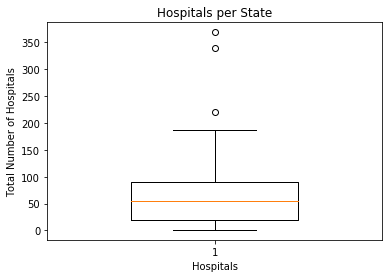

In [236]:
# Box plot to see which state of hospitals per state which are outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Hospitals per State')
ax1.set_xlabel('Hospitals')
ax1.set_ylabel('Total Number of Hospitals')
ax1.boxplot(st_hospital_numbers, widths = 0.5, vert=True)
plt.savefig("/Users/iqraimam/Desktop/healthcare_module7/Figure4.1.2.png")
plt.show()


In [161]:
# Print state hospital data
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


In [168]:
# Find states with hospital numbers greater than the outlier
df1=st_hosp_data[st_hosp_data['number of hospitals']>196.5]

In [176]:
# Set as index
df2=list(df1.head().index)

In [177]:
# Identify the outlier states
print(df2)

['CA', 'FL', 'TX']


In [178]:
# Create column that shows the percentage of inpatient beds used
st_hosp_data['percentage_beds_occupied'] = st_hosp_data['inpatient_beds_used'] / st_hosp_data['inpatient_beds'] * 100

In [219]:
# Show data frame with the new column
st_hosp_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals,percentage_beds_occupied
state,,,,,
AK,1.632114,1600.081301,1084.013211,11.0,67.747383
AL,15.566604,13320.209193,10315.438806,90.0,77.442018
AR,12.816184,8358.250749,5763.789211,52.0,68.959276
AS,0.006452,150.000000,67.913978,1.0,45.275986
AZ,16.815920,14717.461692,10900.769154,76.0,74.066910


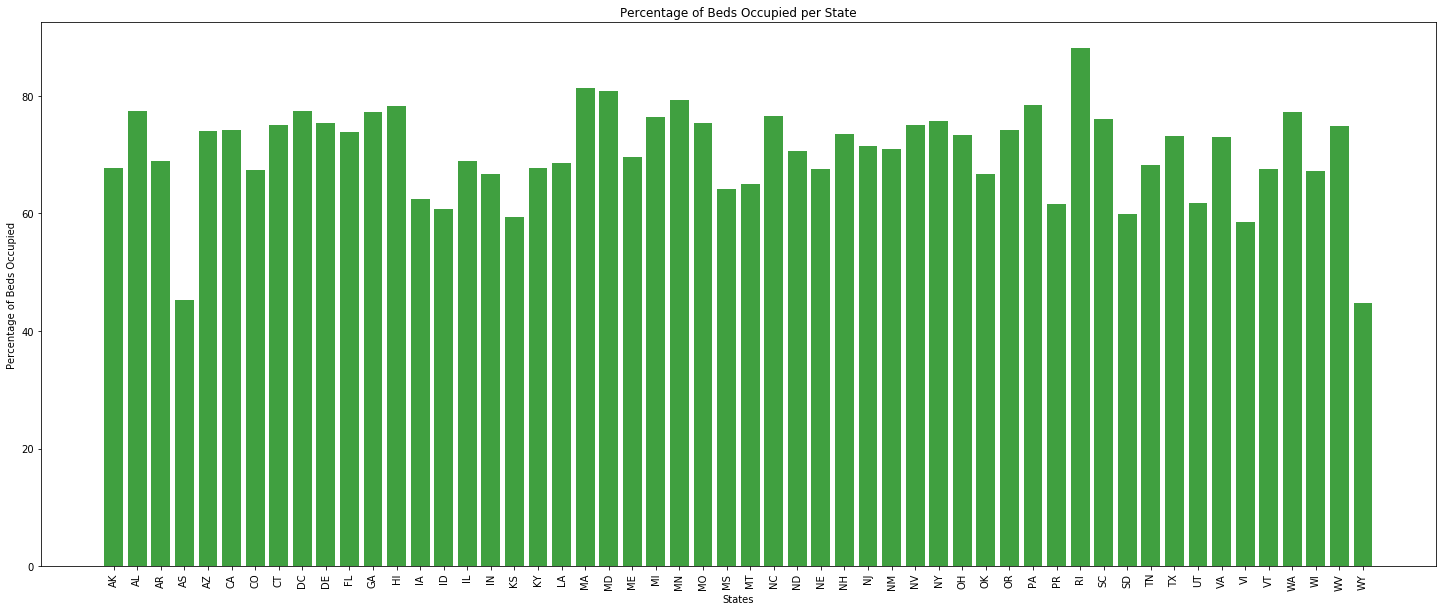

In [237]:
# Create bar graph to compare the percentages of beds occupied by states
x_axis = st_hosp_data.index.values
y_axis = st_hosp_data['percentage_beds_occupied'].values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis,y_axis,color='g', alpha=0.75, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Percentage of Beds Occupied per State")
plt.xlabel("States")
plt.ylabel("Percentage of Beds Occupied")
plt.xticks(rotation="vertical")
plt.gcf().set_size_inches(25,10)
plt.savefig("/Users/iqraimam/Desktop/healthcare_module7/Figure4.2.png")
plt.show()

In [220]:
# Number of hospitals quartiles and IQR
# Determine outliers using upper and lower bounds

st_hospital_percentage = st_hosp_data["percentage_beds_occupied"]

quartiles2 = st_hospital_percentage.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

print(f"The lower quartile of number of states is: {lowerq2}")
print(f"The upper quartile of number of states is: {upperq2}")
print(f"The interquartile range of the number of states is: {iqr2}")
print(f"The the median of the number of states is: {quartiles2[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound2 = lowerq2 - (1.5*iqr)
upper_bound2 = upperq2 + (1.5*iqr)

print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

The lower quartile of number of states is: 67.33694758248134
The upper quartile of number of states is: 75.64293386354612
The interquartile range of the number of states is: 8.305986281064776
The the median of the number of states is: 72.2184249468376 
Values below -38.41305241751866 could be outliers.
Values above 181.39293386354612 could be outliers.


In [225]:
# Find the mean of the state's percentage of inpatient beds occupied
mean1 = st_hosp_data["percentage_beds_occupied"].mean()
mean1

70.48185775032218

In [229]:
# Find states with percentage values above the mean
dafr1=st_hosp_data[st_hosp_data['percentage_beds_occupied']>mean1]
dafr2=list(dafr1.head().index)
print(dafr2)

['AL', 'AZ', 'CA', 'CT', 'DC']


In [230]:
# Find states with percentage values below the mean
dafr_1=st_hosp_data[st_hosp_data['percentage_beds_occupied']<mean1]
dafr_2=list(dafr_1.head().index)
print(dafr_2)


['AK', 'AR', 'AS', 'CO', 'IA']


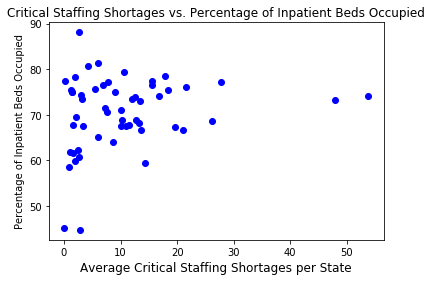

In [242]:
# Scatter plot of number of hospitals vs. avg shortage

marker_size=10
plt.scatter(st_hosp_data['critical_staffing_shortage_today_yes'],st_hosp_data['percentage_beds_occupied'], color="blue")
plt.title('Critical Staffing Shortages vs. Percentage of Inpatient Beds Occupied')
plt.xlabel('Average Critical Staffing Shortages per State',fontsize =12)
plt.ylabel('Percentage of Inpatient Beds Occupied')
plt.savefig("/Users/iqraimam/Desktop/healthcare_module7/Figure4.2.1.png")



In [241]:
# Find the correlation between the number of hospitals and critical staffing shortage
correlation = st.pearsonr(st_hosp_data['critical_staffing_shortage_today_yes'],st_hosp_data['percentage_beds_occupied'])
print(f"The correlation between the average critical staffing shortage and the percentage of inpatient beds occupied is {round(correlation[0],2)}")

The correlation between the average critical staffing shortage and the percentage of inpatient beds occupied is 0.2
